# Iris Dataset 

Configurations and importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_rows = 20

*Getting the dataset out as a DataFrame*

In [2]:
iris = pd.read_csv("iris.csv", header = None, names = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "Species"])
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


# 1. Data Analysis

*To display the statistics summary of the dataset such as mean, median, mode, standard deviation etc.*

In [3]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Data Cleaning**

*To check for any empty values*

In [4]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

So since we do not have any empty values, we will proceed to the next 2 steps of data cleaning
1. Getting rid of outliers
2. Find correlation

**Finding outliers**

The best graph to identify any outliers is the box plot. 
This is because, the box plot graph displays the minimum, lower quartile (25th percentile), median (50th percentile), upper quartile (75th percentile), and a maximum of a continuous variable.

Below is the box plot of the different species with each individual feature.

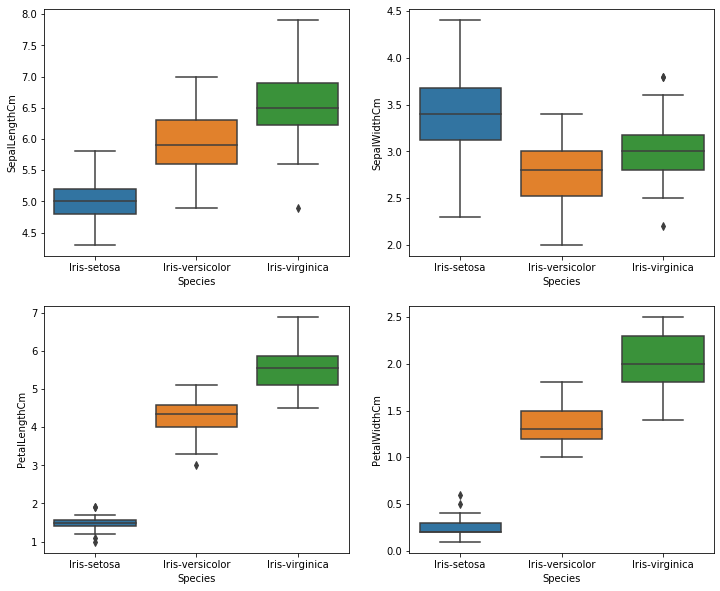

In [5]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x="Species",y="SepalLengthCm",data=iris)
plt.subplot(2,2,2)
sns.boxplot(x="Species",y="SepalWidthCm",data=iris)
plt.subplot(2,2,3)
sns.boxplot(x="Species",y="PetalLengthCm",data=iris)
plt.subplot(2,2,4)
sns.boxplot(x="Species",y="PetalWidthCm",data=iris)

The outliers are then calculated as below, and removed from the dataset before proceeding to the next step of data processsing.

In [6]:
# Show the outliers
iris_outliers=iris[['SepalLengthCm','SepalWidthCm', 'PetalLengthCm','PetalWidthCm']]
z = np.abs(stats.zscore(iris_outliers))
#iris[(np.abs(stats.zscore(iris)) < 3).all(axis=1)]
iris_outliers =iris_outliers[~(z < 3).all(axis=1)]
iris_outliers

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
15,5.7,4.4,1.5,0.4


Hence this will be the final dataset that will be used to train the model.

In [7]:
iris = iris.drop(iris_outliers.index.values).reset_index(drop = True)
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


**Identifying correlations**

Scatter plot shows the relationship between two variable but does not indicates the strength of relationship amongst them. To find the strength of the relationship, we calculate the correlation. Correlation varies between -1 and +1.

-1: perfect negative linear correlation  
+1: perfect positive linear correlation  
0: No correlation

By plotting the pairplot, the relationship between each pair of features can be visualized.

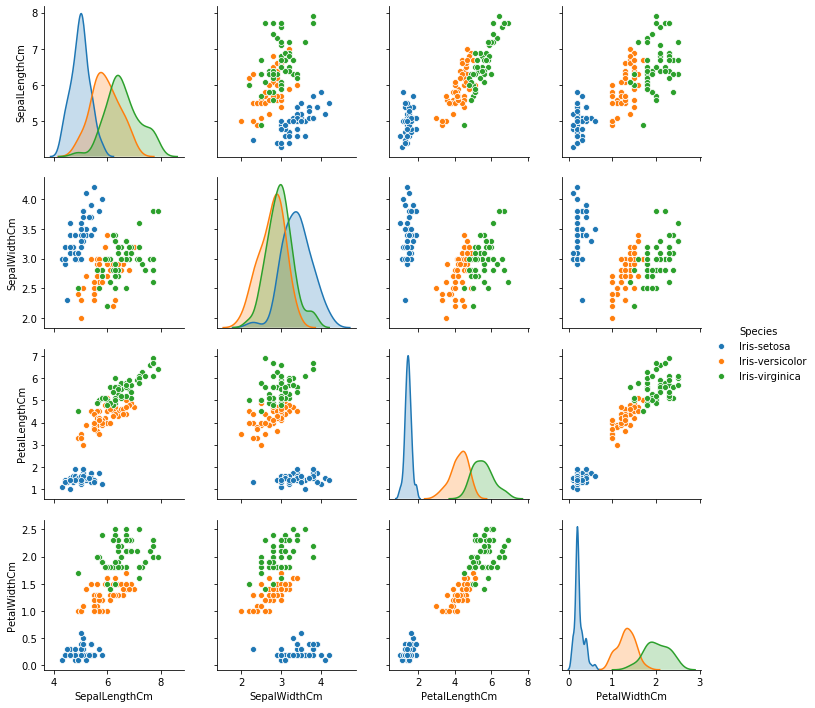

In [8]:
sns.pairplot(iris, hue="Species")

*From the above pairplots, we can see that the species, Iris-setosa, is separated from the other 2 species across all pairs of features combinations.*

A heat map can be used to show the values of correlation

[]

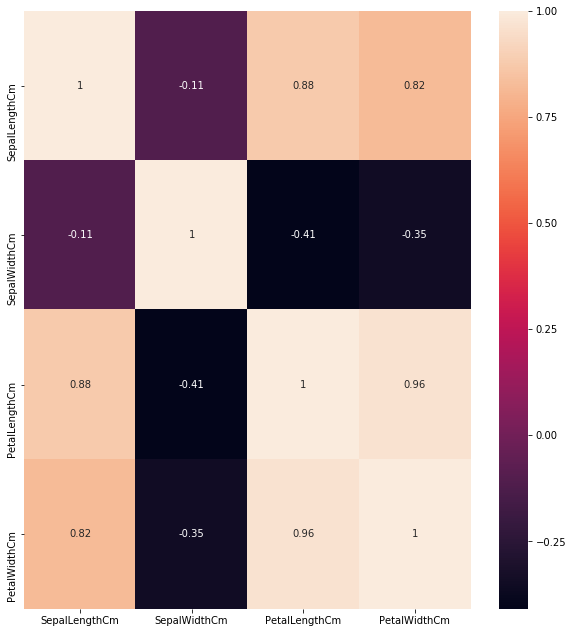

In [9]:
plt.figure(figsize=(10,11))
sns.heatmap(iris.corr(),annot=True)
plt.plot()

From the heatmap, we can see that the petal length and petal width has a high correlation of 0.96259.

In [10]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109370,0.875204,0.819851
SepalWidthCm,-0.109370,1.000000,-0.409417,-0.347337
PetalLengthCm,0.875204,-0.409417,1.000000,0.962598
PetalWidthCm,0.819851,-0.347337,0.962598,1.000000


**Observations**  

The Sepal Width and Length are weakly correlated.  
The Petal Width and Length are highly correlated.  
Sepal Length is also a good indicator of Petal Length and Width.  

Since the dataset size is small, we will use all the features for training the algorithm and check the accuracy as it would be counter productive to calculate the Weight of Evidence (WOE) and Information Value (IV).

Then we will use 1 Petal Feature and 1 Sepal Feature to check the accuracy of the algorithm as we are using only 2 features that are not correlated. Thus we can have a variance in the dataset which may help in better accuracy. We will check it later.

# 2. Model Training

In [11]:
# Importing sklearn for model training

# Importing all the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.neighbors import KNeighborsClassifier  # for K Nearest Neighbours algorithm
from sklearn import svm  #for Support Vector Machine (SVM) algorithm
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree algorithm
from sklearn import metrics #for checking the model accuracy

#to split the dataset for training and testing
from sklearn.model_selection import train_test_split

Splitting the dataset into training and testing datasets  
Using the ratio of train = 70% and test = 30%

In [12]:
train, test = train_test_split(iris, test_size = 0.3)
print('Train Shape: {}'.format(train.shape))
print('Test Shape: {}'.format(test.shape))

Train Shape: (104, 5)
Test Shape: (45, 5)


In [13]:
# Taking the training data features and outputting the train data
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
train_y=train.Species

# Taking the testing data features and outputting the test data
test_X= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
test_y =test.Species

Checking the splits of the train data and test data

In [14]:
train_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
88,5.5,2.5,4.0,1.3
68,5.6,2.5,3.9,1.1
51,6.9,3.1,4.9,1.5
102,6.3,2.9,5.6,1.8
80,5.5,2.4,3.7,1.0


In [15]:
test_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
27,5.2,3.4,1.4,0.2
130,7.9,3.8,6.4,2.0
24,5.0,3.0,1.6,0.2
57,6.6,2.9,4.6,1.3
17,5.7,3.8,1.7,0.3


Checking the labels of the train data

In [16]:
train_y.head()

88     Iris-versicolor
68     Iris-versicolor
51     Iris-versicolor
102     Iris-virginica
80     Iris-versicolor
Name: Species, dtype: object

## Support Vector Machine (SVM)

In [17]:
model_svm = svm.SVC(probability=True) 
model_svm.fit(train_X,train_y) 
prediction_svm=model_svm.predict(test_X) 
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction_svm,test_y))

The accuracy of the SVM is: 1.0


## Logistic Regression

In [18]:
model_lr = LogisticRegression()
model_lr.fit(train_X,train_y)
prediction_lr=model_lr.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction_lr,test_y))

The accuracy of the Logistic Regression is 0.9333333333333333


## Decision Tree

In [19]:
model_dt=DecisionTreeClassifier()
model_dt.fit(train_X,train_y)
prediction_dt=model_dt.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction_dt,test_y))

The accuracy of the Decision Tree is 0.9111111111111111


## K-Nearest Neighbors

In [20]:
#this examines 3 neighbours for putting the new data into a class
model_knn=KNeighborsClassifier(n_neighbors=3) 
model_knn.fit(train_X,train_y)
prediction_knn=model_knn.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction_knn,test_y))

The accuracy of the KNN is 0.9777777777777777


To check the accuracy for various values of n for K-Nearest Neighbors

([<matplotlib.axis.XTick at 0x169b3c532e8>,
 <a list of 10 Text xticklabel objects>)

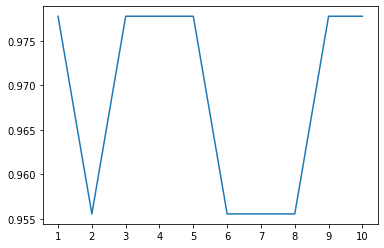

In [21]:
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_y)))
plt.plot(a_index, a)
plt.xticks(x)

In [22]:
#Create a dictionary of models
#Support Vector Machine (SVM)
#Logistic Regression
#Decision Tree
#K-Nearest Neighbors
dict_models = {'SVM': model_svm, 
               'LogReg': model_lr, 
               'DecTree': model_dt, 
               'KNN': model_knn}

**Input in a CSV file of test data for prediction**

In [23]:
input_csv = str(input('Enter your csv filepath (with column headers): ')).replace('"', '')

Enter your csv filepath (with column headers): test_inputs.csv


**Or use the following sample test data**

In [24]:
df_test=pd.DataFrame({'SepalLengthCm':[6,5.4,5,6.7,4.6,5.6,7.7,6.9,5.1,5.6],
                 'SepalWidthCm':[4,3.9,3.6,3.1,3.1,3,2.6,3.2,3,2.9],
                 'PetalLengthCm':[1.5,1.7,1.4,4.4,1.5,4.5,6.9,5.7,1.6,3.6],
                 'PetalWidthCm':[0.4,0.2,0.3,1.4,0.3,1.5,2.3,2.3,0.2,1.3,]})

**View and check inputs given**

In [25]:
if input_csv:
    try:
        df_input = pd.read_csv(input_csv)
    except:
        print ('Something went wrong with the loading of the test data :( \nPlease check your filepath.')
        print ('We will be using the df_test data instead until then.')
        df_input = df_test
else:
    df_input = df_test
df_input

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,6.0,4.0,1.5,0.4
1,5.4,3.9,1.7,0.2
2,5.0,3.6,1.4,0.3
3,6.7,3.1,4.4,1.4
4,4.6,3.1,1.5,0.3
5,5.6,3.0,4.5,1.5
6,7.7,2.6,6.9,2.3
7,6.9,3.2,5.7,2.3
8,5.1,3.0,1.6,0.2
9,5.6,2.9,3.6,1.3


# 3. Evaluation

**DataFrame of Models Used, Prediction Labels and their Probabilities**

In [26]:
df_answer = pd.DataFrame()
dict_answers = {}

for name, model in dict_models.items():
    # To create new rows for each model
    df_answer = df_answer.append([df_input], ignore_index=True)
    # To input Model Name used to predict
    for row in range(len(df_input)):
        dict_answers['Model Name'] = dict_answers.setdefault('Model Name', []) + [name]
    # To input Predicted Label
    predicted_label = model.predict(df_input).tolist()
    dict_answers['Predicted Label'] = dict_answers.setdefault('Predicted Label', []) + predicted_label
    # To input Predicted Probability
    predicted_prob_list =  model.predict_proba(df_input).tolist()
    predicted_prob = [max(category_prob) for category_prob in predicted_prob_list]
    dict_answers['Predicted Probability'] = dict_answers.setdefault('Predicted Probability', []) + predicted_prob

df_answer = df_answer.join(pd.DataFrame.from_dict(dict_answers))
df_answer

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Model Name,Predicted Label,Predicted Probability
0,6.0,4.0,1.5,0.4,SVM,Iris-setosa,0.896960
1,5.4,3.9,1.7,0.2,SVM,Iris-setosa,0.937207
2,5.0,3.6,1.4,0.3,SVM,Iris-setosa,0.957263
3,6.7,3.1,4.4,1.4,SVM,Iris-versicolor,0.973425
4,4.6,3.1,1.5,0.3,SVM,Iris-setosa,0.933404
5,5.6,3.0,4.5,1.5,SVM,Iris-versicolor,0.914958
6,7.7,2.6,6.9,2.3,SVM,Iris-virginica,0.956406
7,6.9,3.2,5.7,2.3,SVM,Iris-virginica,0.981493
8,5.1,3.0,1.6,0.2,SVM,Iris-setosa,0.925837
9,5.6,2.9,3.6,1.3,SVM,Iris-versicolor,0.979088


**Saving output to a CSV file**

In [27]:
df_answer.to_csv('answers.csv', index=False)